## Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
from wordcloud import WordCloud
from PIL import Image

import nltk
from nltk.corpus import stopwords

from sklearn.metrics import recall_score, precision_score, f1_score

# Constants

In [58]:
POSTS_TEXTS = 'Posts and Labels/Posts.txt'
LABELS = 'Posts and Labels/Labels.txt'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
FREE = 0
HATE = 1

In [33]:
stream = open(POSTS_TEXTS, encoding='utf-8')
posts_content = stream.read()
posts_list = posts_content.split("\n")
stream.close()



In [4]:
stream2 = open(LABELS, encoding='utf-8')
labels_content = stream2.read()
labels_list = labels_content.split("\n")
stream2.close()


In [5]:
labels_list[27002] = 'Free'
annot_label = []

for label in labels_list:
    if label == 'Free':
        annot_label.append(FREE)
    elif label == 'Hate':
        annot_label.append(HATE)
    


In [6]:
posts = pd.DataFrame(posts_list, index=range(len(posts_list)))
posts.columns = ['POST']

In [7]:
labels = pd.DataFrame(annot_label, index=range(len(annot_label)))
labels.columns = ['CAT']

In [8]:
full_data = pd.concat([posts,labels], axis=1)

In [9]:
full_data.head()

,POST,CAT
0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,0
1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...,0
2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,0
3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,0
4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,1


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/henok/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = set(stopwords.words('am'))
full_data.POST[1].split()


['እነዚህን',
 'ወሳኝ',
 'ጉዳዮችን',
 'የሚያስፈፅም',
 'አካል',
 'እንዲቋቋምና',
 'ክትትል',
 'እንዲደረግ',
 'በመግለጫው',
 'ጠይቀዋል']

In [12]:
# filtered_words = []
    
# for post in full_data.POST:
#     index = full_data.POST.index(post)
#     full_data.POST[index]
#     filtered_words = []
#     for word in post.split():
#         if word not in stop_words:
#             f' {word}'.join(filtered_words)

In [13]:
vectorizer = CountVectorizer()

In [14]:
all_features = vectorizer.fit_transform(full_data.POST)

In [15]:
all_features.shape

(30000, 112747)

In [16]:
len(vectorizer.vocabulary_)

112747

In [44]:
listOfVocabulary = vectorizer.vocabulary_.keys()
type(listOfVocabulary)
word_list = [''.join(word) for word in listOfVocabulary]
word_list_as_string = ' '.join(word_list)
word_list_as_string

'አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለማገዝ ብሞክር እርስዎ የመፅሀፍ ቅዱሱ የዳዊት ኦሮዮንን መንገድ በመምረጥዎ በይፋ ለመፃፍ ተገድጃለሁ አሁንም መረጃው እንዴት እሱ ጋር ደረሰ የሚለውን ውትወታ ትተው በማንኛውም ቀጥተኛ ምላሽ ይስጡኝ ከመስከረም ወዲያ አሁን ያለሁ መንግስት ህጋዊ የስራ ዘመኑ ስለሚያበቃ የባለአደራ እንዲቋቋም ሆኖም ያለው የአብይ አስፈፃሚ አካል የመንግስትን የእለ ተእለት ተግባራትን እየከወነ ምርጫ እስኪደረግ አመት እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም እንዲቋቋምና ክትትል እንዲደረግ በመግለጫው ጠይቀዋል የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የእውቀት ጎዳና አይኑ ያላየው ጆሮው ያልሰማው ልቡ ያላሰበው እውቀትና ብልሀት የለም ከአማራ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመልክ በመልኩ ሲቀዳበት የኖረ ከኢትዮጵያ አልፎ ለአለም ሲታደል የኖረውና የሚኖረው የተገኘበት ታላቅ ነገድ ነው ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ ላይ ብቻ ነውሌላው የትህነግን ባንዲራ ለብሶየኦነግን እያውለበለበ የኢትዮጵያን ሰንደቅአላማ በእግሩ ረግጦታልጨርቅ ብለው አቃጥለውታልቀዳደው ጥለውታል ግን ደም የገበረባትአጥንት የከሰከሰባት ናትና በሀዘኑበደስታውበአደባባይና በሰልፍ በክብር ያውለበልባታልይፎክርባታልያዜምባታል የኢትዮጵያ ብሄራዊ ቡድን በመቀሌ እስታዲየም ሲጫወት የገቡት ደጋፊዎች በፍሬ የሚቆጠሩ ናቸው ሊያውም ይዘውት የደደቢት አርማ ይዘው እንደሆነ የቅርብ ጊዜ ትውስታ ዛሬም የአርሰናሉን ፔፔን የቶተንሀሙን ሰርጅ አውሪር ይዞ የገባው ኮትዲሾዋር ወጣቶች አስደማሚ ድጋፍ ዋልያዎቹ አሸንፈው ወጥተዋል ስማ ለምን ኡነተኛ ታሪክ አታወራም ለምንስ የሰው ትሰርቃላቹ 

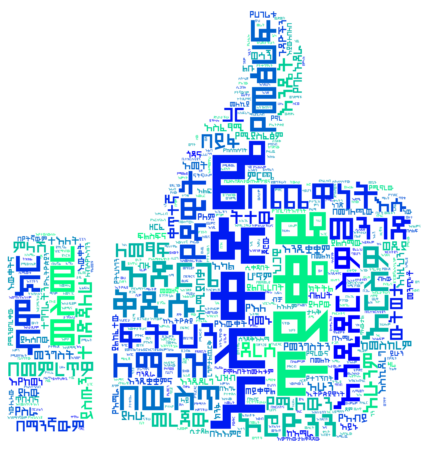

In [60]:
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array


word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=500, colormap='winter', font_path='Tera-Regular.ttf')

word_cloud.generate(word_list_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
X_train.shape

(21000, 112747)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(all_features, full_data.CAT, 
                                                   test_size=0.3, random_state=88)

In [19]:
X_test.shape

(9000, 112747)

In [20]:
classifier = MultinomialNB()

In [21]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
classifier.score(X_test, y_test)

0.6571111111111111

In [23]:
recall_score(y_test, classifier.predict(X_test))

0.6739415102575295

In [24]:
precision_score(y_test, classifier.predict(X_test))

0.6598290598290598

In [25]:
f1_score(y_test, classifier.predict(X_test))

0.6668106240552796

In [30]:
exampel = [
    'አማራን ማጥፋት አለብን',
    'አበበ በሶ በላ'
]
x = vectorizer.transform(exampel)
classifier.predict(x)

array([1, 0])

In [27]:
pickle.dump(vectorizer, open("models/vector.pkl", "wb"))

In [28]:
pickle.dump(classifier, open('models/classifier.pkl', 'wb'))